Total unique Categories are 33 


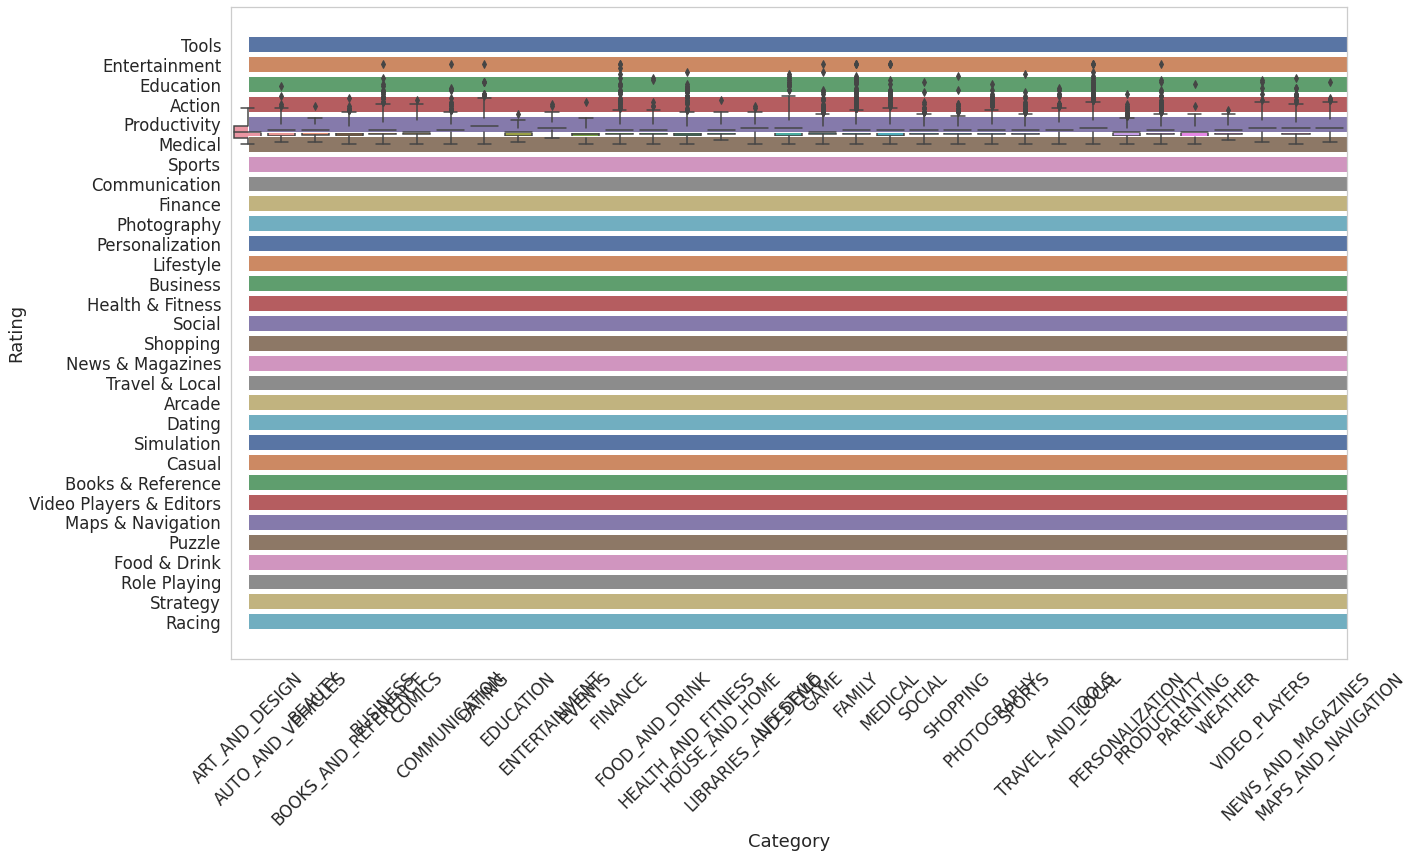

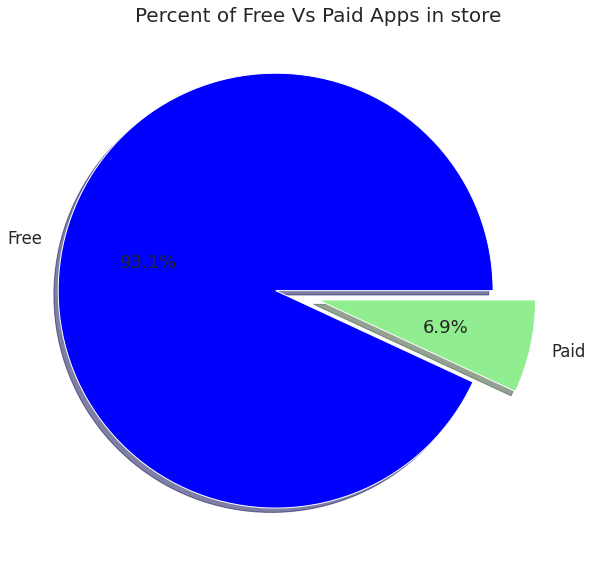

There are 8892 total rows.
4568 Apps are Popular!
4324 Apps are Unpopular!

For an 80-20 training/test split, we need about 1778.4 apps for testing

Predicted:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0]
Accuracy Percentage:  88.4572072072072
[[756  10]
 [195 815]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



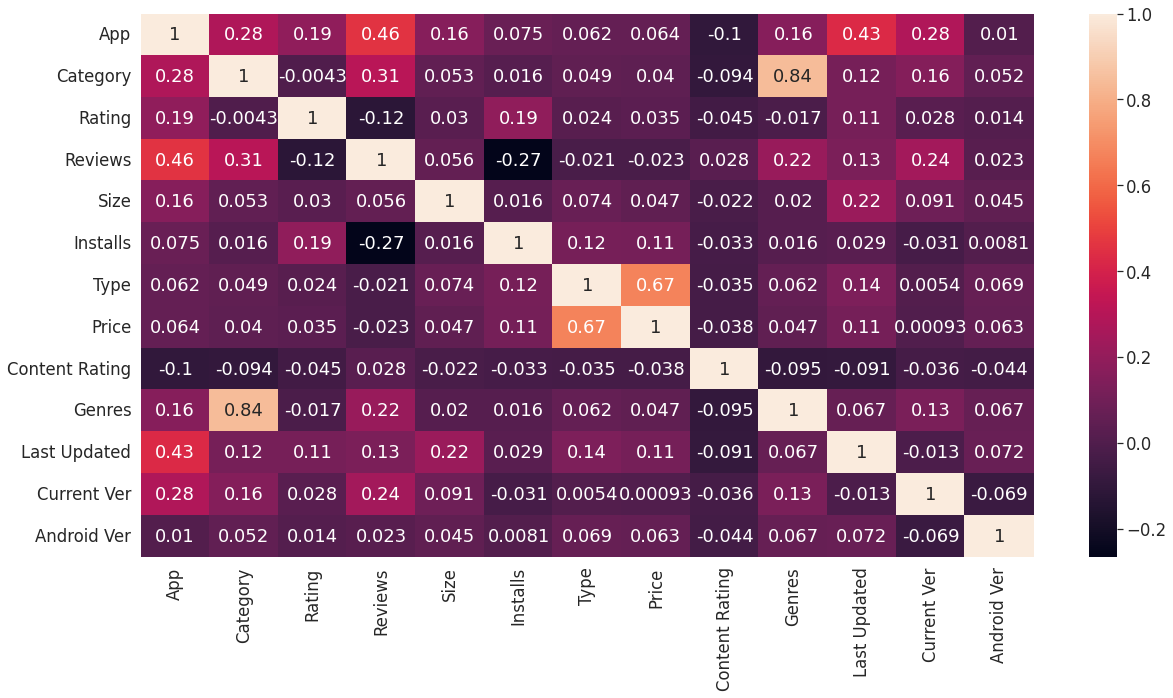

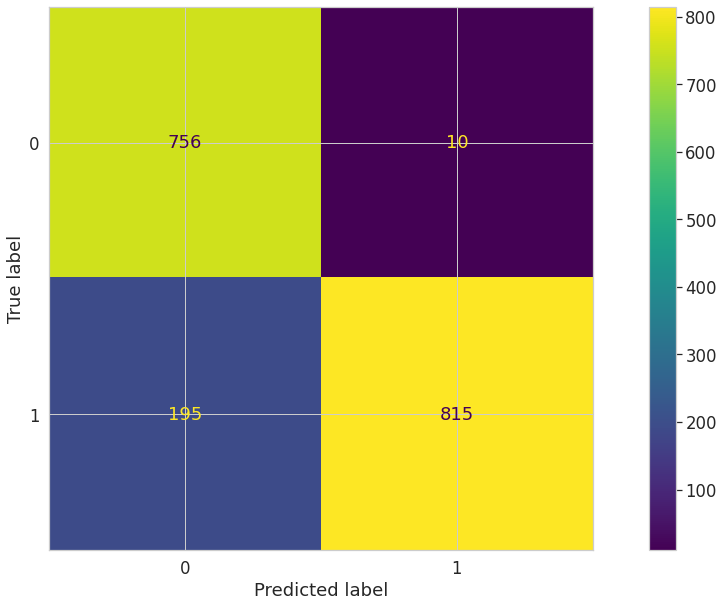

XGBoost Classifier Test Accuracy: 0.956081081081081
XGBoost confusion_matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



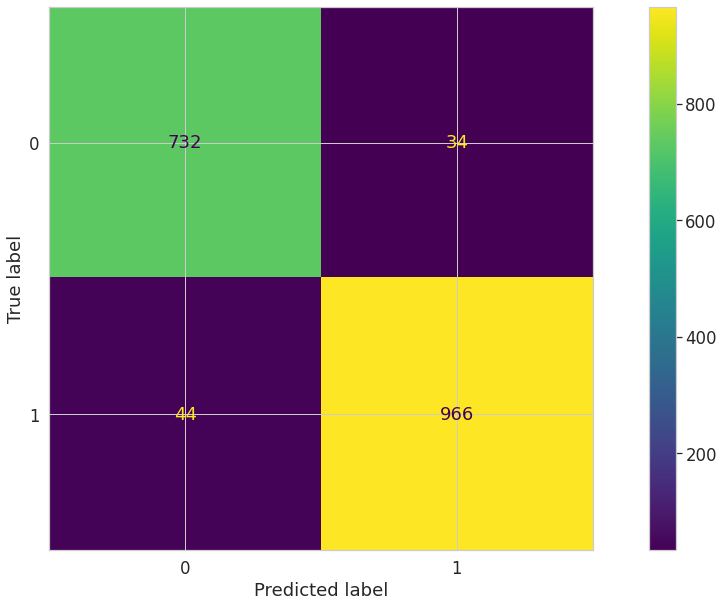

[[732  34]
 [ 44 966]]
KNeighborsClassifier Test Accuracy: 0.8806306306306306
[[707  59]
 [153 857]]


AttributeError: ignored

In [14]:
#mporting the packges/libraries



import pandas as pd 
import numpy as np  
import seaborn as sns 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 
from sklearn import svm



#readind the file data using pandas
df=pd.read_csv("/content/googleplaystore.csv")
df.head()
#df.info()

df.isnull().sum()

categories = list(df["Category"].unique())
print("Total unique Categories are {0:.0f} ".format(len(categories)-1))

mislabel = df.loc[df["Category"] == "1.9"]
df = df.drop(int(mislabel.index.values),axis=0)
#print(df["Category"].unique())
#Total number of rating with null values
df['Rating'].isnull().sum()


#dropping null values
df = df.drop(df[df['Rating'].isnull()].index, axis=0)

##################Charts Start #########################
# Compare Apps vs Ratings
layout = go.Layout(
    xaxis=dict(title='Ratings'),yaxis=dict(title='Total Apps'))
data = [go.Histogram(x=df["Rating"])]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')

#Show top 30 app genres
plt.figure(figsize=(20, 12))
genres = df["Genres"].value_counts()[:30]
ax = sns.barplot(x=genres.values, y=genres.index, palette="deep")

sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='center')


plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()


df.dtypes
df["Type"] = (df["Type"] == "Paid").astype(int)
corr = df.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

##################Charts End #########################

######################Algorithm start

#Extract App, Installs, & Content Rating from df_apps
popApps = df.copy()
popApps = popApps.drop_duplicates()
#data wrangling Remove characters preventing values from being floats and integers

popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:50,['App','Installs','Content Rating']]


#To predict  sucess of app we will define 1000 as threshold . If installs are greater than threshold,App will be succesful otherwise unsuccesful

popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes


#dropping unncessary data as we see in the correlation these column have no relation and some have negative relation
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)


testDf = testPop1.append(testPop0)
trainDf = popAppsCopy
#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()




model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
predicted = model.predict(X_test)

print("Predicted: ",predicted[:25])
print("Actual:    ",np.array(y_test[:25]))
print("Accuracy Percentage: " ,accuracy_score(y_true = y_test, y_pred = predicted)*100)

cm = confusion_matrix(y_test, predicted)
print(cm)  
plot_confusion_matrix(model, X_test, y_test);
plt.show()
########another XGBClassifier

XGBClassifier_eval_set = [(X_test, y_test)]

model_xgb = xgb.XGBClassifier(n_estimators=500,                          
                          learning_rate=0.05,
                          random_state=42,
                          eval_set=XGBClassifier_eval_set,
                          max_depth=3,
                          eval_metric='merror',
                          early_stopping_rounds=10,
                          verbose=True,
                          n_jobs=-1)

model_xgb.fit(X_train, y_train);
model_xgb_predicted = model_xgb.predict(X_test)
print("XGBoost Classifier Test Accuracy:", model_xgb.score(X_test, y_test))

print("XGBoost confusion_matrix")
plot_confusion_matrix(model_xgb, X_test, y_test);
plt.show()
cm = confusion_matrix(y_test, model_xgb_predicted)
print(cm)  
##############KNeighborsClassifier



classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_test, y_test)
classifier_predicted = classifier.predict(X_test)
print("KNeighborsClassifier Test Accuracy:", classifier.score(X_test, y_test))
cm = confusion_matrix(y_test, classifier_predicted)
print(cm)  

#######SVM


     |████████████████████████████████| 74 kB 1.7 MB/s 
     |████████████████████████████████| 276 kB 18.8 MB/s 
     |████████████████████████████████| 100 kB 7.9 MB/s 
     |████████████████████████████████| 106 kB 28.6 MB/s 
     |████████████████████████████████| 98 kB 5.7 MB/s 
     |████████████████████████████████| 175 kB 37.2 MB/s 
     |████████████████████████████████| 525 kB 45.2 MB/s 
     |████████████████████████████████| 925 kB 35.4 MB/s 
     |████████████████████████████████| 829 kB 46.8 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 180 kB 56.7 MB/s 
     |████████████████████████████████| 131 kB 50.6 MB/s 
     |████████████████████████████████| 8.4 MB 26.7 MB/s 
     |████████████████████████████████| 79 kB 4.3 MB/s 
     |████████████████████████████████| 138 kB 70.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 332 kB 46.4 MB/s 
     |███████████████████